***Google Monthly Stock Prediction***

Using the dataset from kaggle.com. I will use it to build a model that predicts the stock price of Google for the 
next month. The dataset contains 4 mainly needed columns to complete the prediction. Opening and Closing of stock 
will be of great value here. This will form a model on its own and then a model for low and high stock price will be
built.

First, let's load the dataset and see what we have in it.

In [1]:
import pandas as pd

data = pd.read_csv('GOOGLE_monthly.csv')

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
231,2023-12-01,133.320007,143.945007,129.399994,140.929993,140.929993,482059400
232,2024-01-01,139.600006,155.199997,136.850006,141.800003,141.800003,428771200
233,2024-02-01,143.690002,150.695007,136.639999,139.779999,139.779999,475231400
234,2024-03-01,139.610001,153.199997,131.550003,152.259995,152.259995,507008200
235,2024-03-28,152.000000,152.669998,151.330002,152.259995,152.259995,20971645


The dataset contains 7 columns. We will be using the Date, Open, High, Low, Close, Volume(The number of shares traded
on that month) and Adj Close(Adjusted closing price of the company's stock on that month) columns.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       236 non-null    object 
 1   Open       236 non-null    float64
 2   High       236 non-null    float64
 3   Low        236 non-null    float64
 4   Close      236 non-null    float64
 5   Adj Close  236 non-null    float64
 6   Volume     236 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


**Data Cleaning**

In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset. 

**Data Visualization**

We can now proceed to check the trends of the stock prices over the years. We will plot the Open and Close prices of 
the stock. 

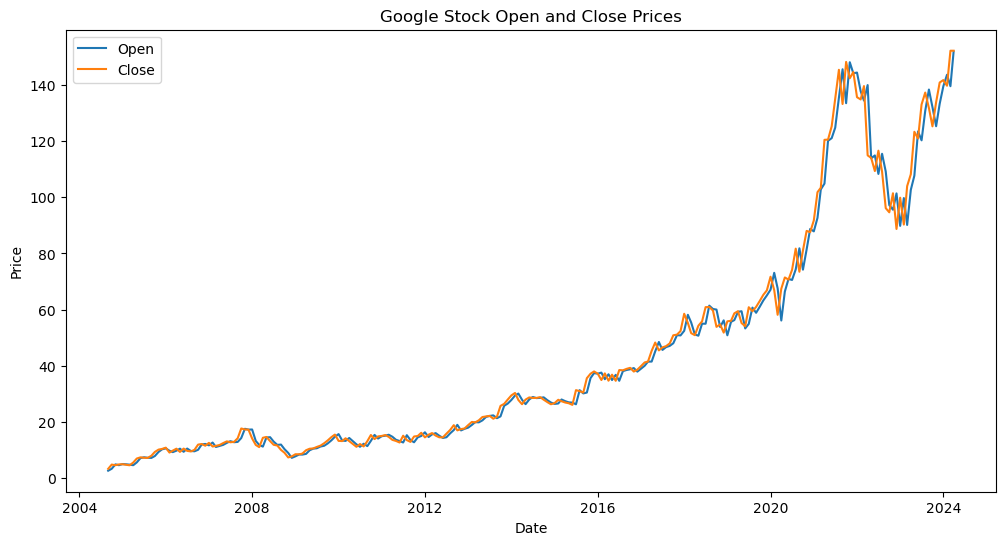

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data,x='Date', y='Open', label='Open')
sns.lineplot(data,x='Date', y='Close', label='Close')
plt.title('Google Stock Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The plot shows that the stock price of Google has been increasing over the years. The Open and Close prices are
almost the same.Now let us see the difference in the High and Low prices of the stock.

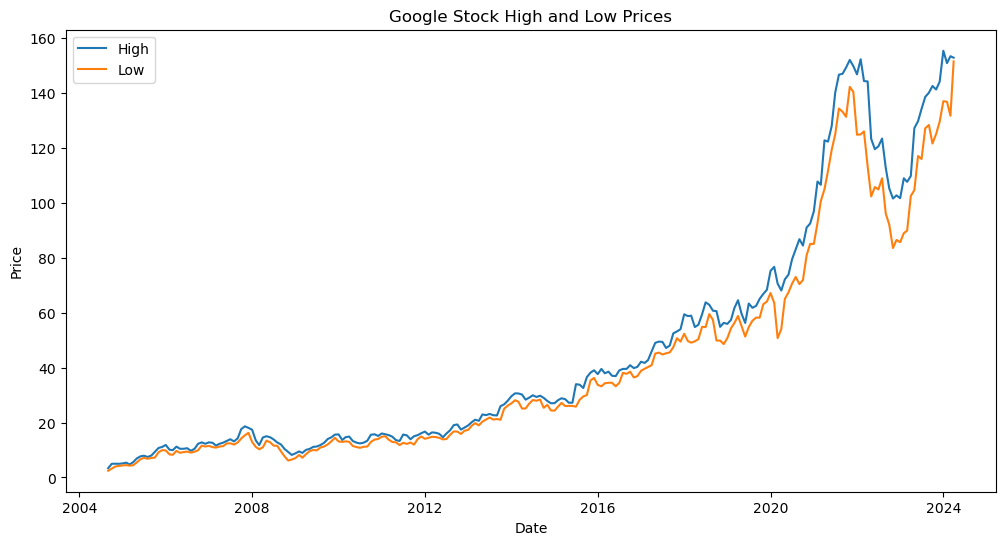

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data,x='Date', y='High', label='High')
sns.lineplot(data,x='Date', y='Low', label='Low')
plt.title('Google Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The plot shows that the High and Low prices of the stock have been increasing over the years. The High price is
higher than the Low price. The difference between the High and Low prices is not much.

**Model Building**

We will build a model that predicts the stock price of Google for the next month. We will use the Open and Close
prices of the stock to build the first model. First, we need to stabilise the data by removing the trend and 
seasonality. We shall smoothen it out using the Moving Average method.